# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

#### Data URL
#### severe weather, Washtenaw County, MI (Ann Arbor)  
##### https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=07&beginDate_dd=01&beginDate_yyyy=2007&endDate_mm=07&endDate_dd=31&endDate_yyyy=2017&county=WASHTENAW%3A161&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=26%2CMICHIGAN
#### US Census Data, 2010-2016, County Data
##### https://www.census.gov/data/datasets/2016/demo/popest/counties-total.html
#### US Census Data, 2000-2010, County Data
##### https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-counties.html


### Load Libraries

In [207]:
import pandas as pd
import numpy as np

### Load csv files

In [208]:
dfCensus19702010 = pd.read_csv('./co-est00int-tot.csv', encoding='latin1')
dfCensus20102016 = pd.read_csv('./co-est2016-alldata.csv', encoding='latin1')

In [472]:
dfAnnArborWeather = pd.read_csv('./storm_data_search_results_WashtenawCounty.csv')

In [209]:
columns = ['SUMLEV','REGION','DIVISION','STATE','COUNTY']
dfCensus19702010.drop(columns,inplace=True,axis=1)
dfCensus20102016.drop(columns,inplace=True,axis=1)

### Extract the Census data for Washtenaw County 2000-2016

In [210]:
dfWashtenawCensus2010 = dfCensus19702010.loc[(dfCensus19702010['STNAME'] == 'Michigan') & (dfCensus19702010['CTYNAME'] == 'Washtenaw County')]
dfWashtenawCensus2010plus = dfCensus20102016.loc[(dfCensus20102016['STNAME'] == 'Michigan') & (dfCensus20102016['CTYNAME'] == 'Washtenaw County')]


In [211]:
dfWashtenawCensus2010

,STNAME,CTYNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
1334,Michigan,Washtenaw County,322818,324372,328749,332763,336154,339422,342234,344018,345310,341595,343520,344791,345290


In [212]:
dfWashtenawCensus2010plus

,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
1334,Michigan,Washtenaw County,344791,345066,345568,349071,351299,354573,358980,360847,...,-0.804678,2.132988,-5.23737,0.851761,5.24877,1.473507,4.836571,8.21803,0.986348,6.902293


### More data cleaning fun... find all rows with Pop data and insert the data in a new dataframe

In [213]:
### Local function to convert a row of data into a dictionary for coverstion to a dataFrame
def extractPopData(dfX):
    population = {}

    for k,v in dfX.iteritems():
        if k.startswith('POPESTIMATE'): 
            year = k.split('POPESTIMATE')
            census_pop = dfX[k].tolist() 
            
            #print("key", year[1], "value", census_pop[0])
            population[year[1]] = census_pop[0]
    return population

WCensus = extractPopData(dfWashtenawCensus2010)
WCensus2 = extractPopData(dfWashtenawCensus2010plus)

## Merge two dictionaries together
WCensus.update(WCensus2)

In [214]:
dfWashtenawCensus = pd.DataFrame.from_dict(WCensus, orient='index')
dfWashtenawCensus.rename(columns = {0 : 'CensusPopulation'}, inplace=True)
dfWashtenawCensus.index.rename('Year', inplace=True)

### Clean the Weather data

In [473]:
import datetime as dt

## Convert date string to dt oject
dfAnnArborWeather['BEGIN_DATE'] = pd.to_datetime(dfAnnArborWeather['BEGIN_DATE'])

## Extract the year from BEGIN_DATE to create a new column (for use with groupby)
dfAnnArborWeather['YEAR'] = dfAnnArborWeather['BEGIN_DATE'].dt.year.astype(str)

In [535]:
dfAnnArborWeather.loc[dfAnnArborWeather['EVENT_TYPE'] == 'Frost/Freeze']

,EVENT_TYPE
YEAR,
2012,Frost/Freeze


In [216]:
dfWeather = dfAnnArborWeather.groupby(['YEAR'])

### Weather Table clean up... drop unused columns

In [476]:
drop_col_name = ['ABSOLUTE_ROWNUMBER','END_LON','BEGIN_LON','BEGIN_LAT','END_LAT','BEGIN_LOCATION','END_LOCATION',
                'BEGIN_AZIMUTH', 'END_AZIMUTH','BEGIN_RANGE','END_RANGE','TOR_WIDTH','TOR_LENGTH', 'FLOOD_CAUSE',
                 'SOURCE','DEATHS_INDIRECT', 'INJURIES_INDIRECT', 'WFO', 'CZ_FIPS', 'CZ_TYPE','EPISODE_ID', 'MAGNITUDE_TYPE'
                ,'CZ_TIMEZONE', 'STATE_ABBR','DAMAGE_CROPS_NUM', 'DAMAGE_PROPERTY_NUM','INJURIES_DIRECT','DEATHS_DIRECT',
                 'TOR_F_SCALE','MAGNITUDE','BEGIN_TIME', 'BEGIN_DATE','CZ_NAME_STR','EVENT_ID']

#Drop duplicated columns generated by the unstacking
dfW4 = dfAnnArborWeather
dfW4.drop(drop_col_name,axis=1,inplace=True)
#dfW4

,EVENT_TYPE,YEAR
0,Thunderstorm Wind,2007
1,Thunderstorm Wind,2007
2,Thunderstorm Wind,2007
3,Thunderstorm Wind,2007
4,Hail,2007
5,Thunderstorm Wind,2007
6,Hail,2007
7,Thunderstorm Wind,2007
8,Thunderstorm Wind,2007
9,Hail,2007


#### The following cell groups data and calculates the number of (weather) events by year
#### Second line pivots the dataframe to have a shape that fits to population dataframe

In [518]:
dfYearEventCount = dfW4.groupby(['YEAR', 'EVENT_TYPE']).size().reset_index(name='EVENT_COUNT')
dfYearEventCount = dfYearEventCount.pivot_table(index='YEAR', columns='EVENT_TYPE', values='EVENT_COUNT', fill_value=0.0)
dfYearEventCount['Event_Count'] = dfYearEventCount.sum(axis=1) ## Create a summary column for all the event types

In [217]:
## DAMAGE_PROPERTY_NUM
## DAMAGE_CROPS_NUM
print(dfWeather.get_group('2007')['DAMAGE_PROPERTY_NUM'].sum(), dfWeather.get_group('2007')['DAMAGE_CROPS_NUM'].sum())
print(dfWeather.get_group('2008')['DAMAGE_PROPERTY_NUM'].sum(), dfWeather.get_group('2007')['DAMAGE_CROPS_NUM'].sum())
print(type(dfWeather.get_group('2007').index))

588000 0
3326000 0
<class 'pandas.core.indexes.numeric.Int64Index'>


In [218]:
### build a new dataframe that contains property damage stats by year
years = np.arange(2007,2017,1).astype(str)

In [219]:
damageDict = {}

for y in years:
    #print(type(y), type(y.astype(str)), y)
    #yr = y.astype(str)
    damageDict.update({y : {'property_damage_sum' : dfWeather.get_group(y)['DAMAGE_PROPERTY_NUM'].sum(),
                            'crop_damage_sum' : dfWeather.get_group(y)['DAMAGE_CROPS_NUM'].sum()
                           } })

dfWashtenawWeather = pd.DataFrame.from_dict(damageDict, orient='index')
dfWashtenawWeather.rename(columns = {0 : 'property_damage', 1 : 'crop_damage'}, inplace=True)
dfWashtenawWeather.index.rename('Year', inplace=True) 

dfWashtenawWeather

,property_damage_sum,crop_damage_sum
Year,,
2007,588000,0
2008,3326000,0
2009,225000,0
2010,225000,0
2011,142000,0
2012,12047000,1300000
2013,2788000,0
2014,256000,0
2015,330000,0


In [308]:
damageDict

{'2007': {'crop_damage_sum': 0, 'property_damage_sum': 588000},
 '2008': {'crop_damage_sum': 0, 'property_damage_sum': 3326000},
 '2009': {'crop_damage_sum': 0, 'property_damage_sum': 225000},
 '2010': {'crop_damage_sum': 0, 'property_damage_sum': 225000},
 '2011': {'crop_damage_sum': 0, 'property_damage_sum': 142000},
 '2012': {'crop_damage_sum': 1300000, 'property_damage_sum': 12047000},
 '2013': {'crop_damage_sum': 0, 'property_damage_sum': 2788000},
 '2014': {'crop_damage_sum': 0, 'property_damage_sum': 256000},
 '2015': {'crop_damage_sum': 0, 'property_damage_sum': 330000},
 '2016': {'crop_damage_sum': 0, 'property_damage_sum': 4059000}}

In [223]:
#dfWashtenawCensus.sort_index(axis=1,inplace=True)
type(dfWashtenawCensus)

pandas.core.frame.DataFrame

In [227]:
yearIndex = dfWashtenawCensus.index.values

array(['2009', '2007', '2002', '2012', '2000', '2014', '2001', '2005',
       '2006', '2010', '2008', '2003', '2013', '2004', '2011', '2015',
       '2016'], dtype=object)

In [238]:
dfWashtenawCensus.drop(['2000','2001','2002','2003','2004','2005','2006'], inplace=True)

dfWashtenawCensus

,CensusPopulation
Year,
2009,343520
2007,345310
2012,351299
2014,358980
2010,345568
2008,341595
2013,354573
2011,349071
2015,360847


In [275]:
dfWashtenawWeather

,property_damage_sum,crop_damage_sum
Year,,
2007,588000,0
2008,3326000,0
2009,225000,0
2010,225000,0
2011,142000,0
2012,12047000,1300000
2013,2788000,0
2014,256000,0
2015,330000,0


### Load matplotlib Library

In [267]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


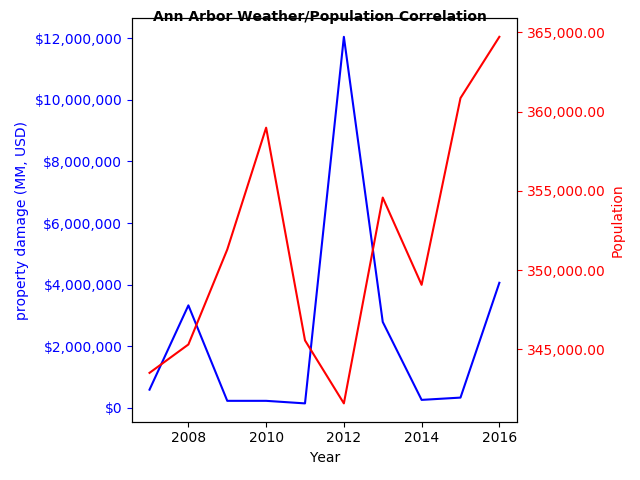

In [273]:
import matplotlib.ticker as mtick

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

plt.close()
fig, axWeather = plt.subplots()


t = dfWashtenawWeather.index.values
s1 = dfWashtenawWeather['property_damage_sum']
axWeather.plot(t, s1, 'b-')
axWeather.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
axWeather.set_ylabel('property damage (MM, USD)', color='b')
axWeather.tick_params('y', colors='b')

fmt = '${x:,.0f}'
#fmt = '${$%1.1fM}'
tick = mtick.StrMethodFormatter(fmt)
axWeather.yaxis.set_major_formatter(tick) 


axCensus = axWeather.twinx()
s2 = dfWashtenawCensus['CensusPopulation']
axCensus.plot(t, s2, 'r-')
axCensus.set_ylabel('Population', color='r')
axCensus.tick_params('y', colors='r')

fmtC = '{x:,.2f}'
tickC = mtick.StrMethodFormatter(fmtC)
axCensus.yaxis.set_major_formatter(tickC) 


fig.tight_layout()

fig.suptitle('Ann Arbor Weather/Population Correlation', fontsize=10, fontweight='bold')

plt.show()

In [519]:
### Combine Census and Weather Phenomeona 

dfWeatherPopulation = pd.merge(dfWashtenawWeather, dfWashtenawCensus,
                                how='inner', 
                                left_index=True, 
                                right_index=True
                              )
dfWeatherPopulation = pd.merge(dfWeatherPopulation,
                              dfYearEventCount,
                              how='inner',
                              left_index=True,
                              right_index=True)

dfWeatherPopulation

,property_damage_sum,crop_damage_sum,CensusPopulation,Cold/Wind Chill,Excessive Heat,Extreme Cold/Wind Chill,Flash Flood,Flood,Frost/Freeze,Hail,Heat,Heavy Snow,High Wind,Lightning,Strong Wind,Thunderstorm Wind,Tornado,Winter Storm,Winter Weather,Event_Count
2007,588000,0,345310,0,0,0,0,0,0,4,0,0,1,0,0,14,1,1,1,22
2008,3326000,0,341595,1,0,0,0,1,0,3,0,5,1,1,0,23,0,3,0,38
2009,225000,0,343520,0,0,1,2,0,0,2,0,0,2,0,0,3,0,2,0,12
2010,225000,0,345568,0,0,0,1,0,0,2,1,2,0,1,1,25,2,0,0,35
2011,142000,0,349071,0,1,0,1,1,0,8,0,1,0,0,1,19,0,0,0,32
2012,12047000,1300000,351299,0,0,0,1,0,1,19,2,1,2,0,0,11,1,0,0,38
2013,2788000,0,354573,0,0,0,1,0,0,8,1,0,2,1,0,14,0,1,0,28
2014,256000,0,358980,2,0,0,0,0,0,7,0,1,2,1,0,34,0,1,0,48
2015,330000,0,360847,0,0,1,1,0,0,14,0,2,0,0,0,10,1,0,0,29
2016,4059000,0,364709,0,0,0,1,0,0,5,0,2,1,0,0,6,0,0,0,15


<IPython.core.display.Javascript object>


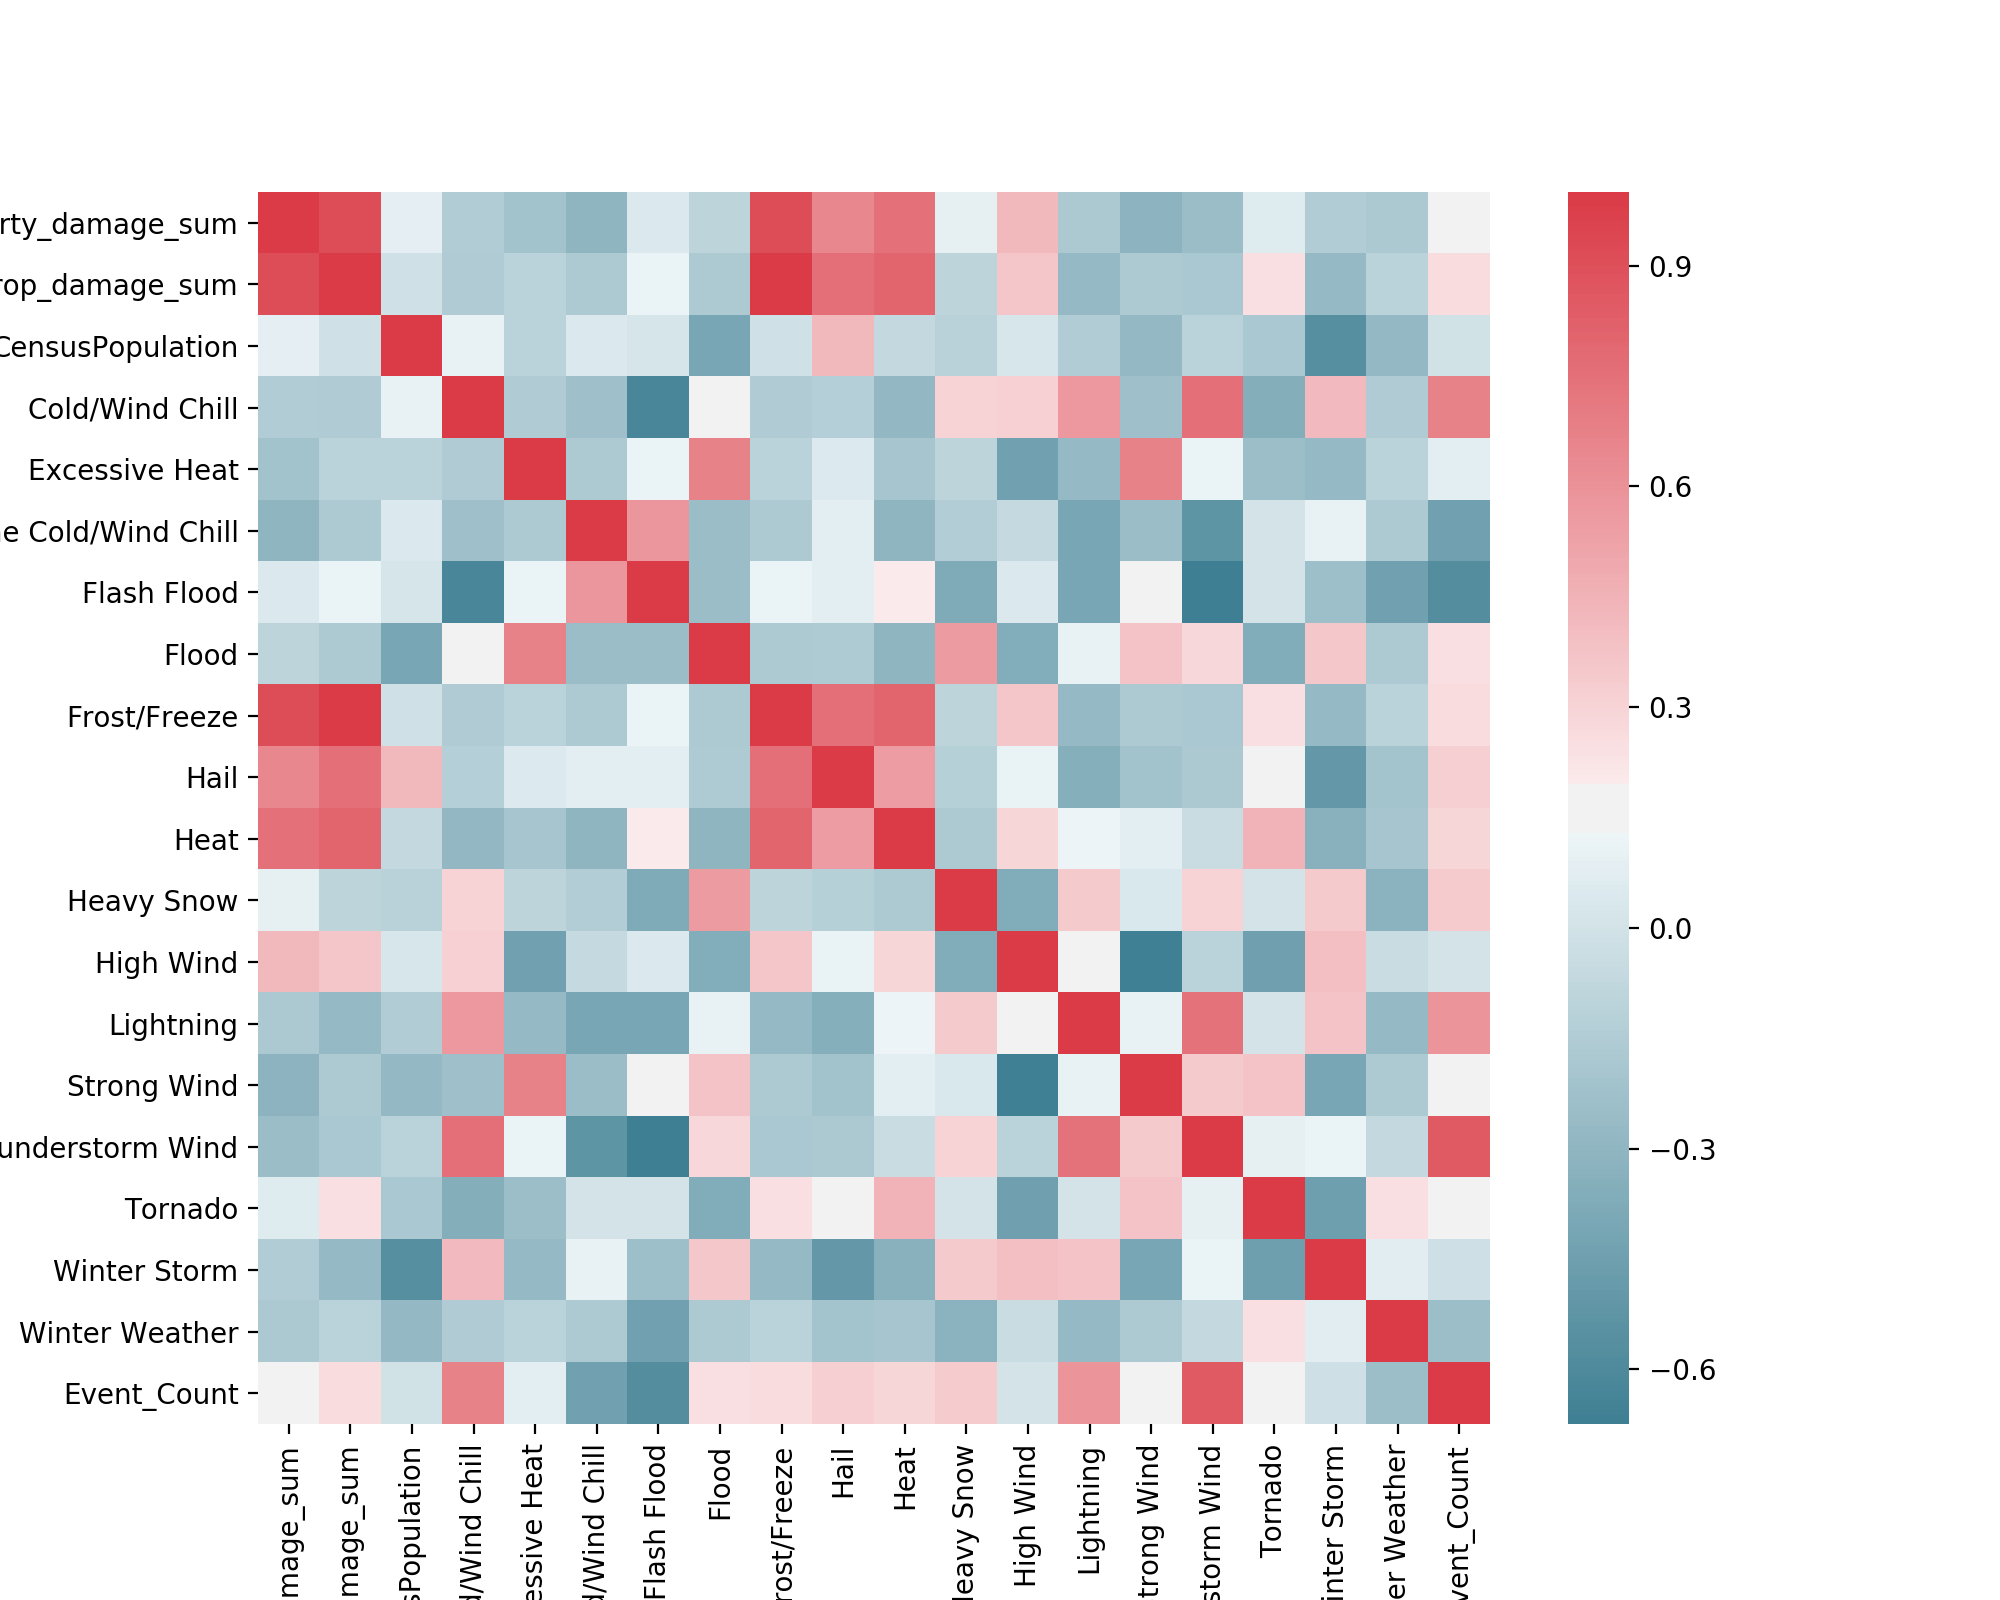

In [520]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = dfWeatherPopulation.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### plot frost/freeze, hail and heat against property/crop damage.. there is a correlation there.

In [521]:
corr

,property_damage_sum,crop_damage_sum,CensusPopulation,Cold/Wind Chill,Excessive Heat,Extreme Cold/Wind Chill,Flash Flood,Flood,Frost/Freeze,Hail,Heat,Heavy Snow,High Wind,Lightning,Strong Wind,Thunderstorm Wind,Tornado,Winter Storm,Winter Weather,Event_Count
property_damage_sum,1.000000,0.914983,0.088938,-0.149191,-0.213999,-3.017243e-01,0.040408,-0.094539,0.914983,0.650349,0.751110,0.094069,0.418543,-1.741839e-01,-0.315096,-0.253501,6.030767e-02,-0.148922,-0.171704,0.164665
crop_damage_sum,0.914983,1.000000,-0.010973,-0.156174,-0.111111,-1.666667e-01,0.111111,-0.166667,1.000000,0.751974,0.804030,-0.093352,0.361158,-2.721655e-01,-0.166667,-0.182510,2.484520e-01,-0.272166,-0.111111,0.264019
CensusPopulation,0.088938,-0.010973,1.000000,0.101776,-0.109476,4.219740e-02,0.016124,-0.412106,-0.010973,0.418131,-0.068980,-0.112250,0.021377,-1.481691e-01,-0.280368,-0.107472,-1.807939e-01,-0.564347,-0.275754,-0.001332
Cold/Wind Chill,-0.149191,-0.156174,0.101776,1.000000,-0.156174,-2.342606e-01,-0.624695,0.156174,-0.156174,-0.137343,-0.282529,0.306162,0.319619,5.738190e-01,-0.234261,0.755626,-3.492151e-01,0.414425,-0.156174,0.669165
Excessive Heat,-0.213999,-0.111111,-0.109476,-0.156174,1.000000,-1.666667e-01,0.111111,0.666667,-0.111111,0.050981,-0.201008,-0.093352,-0.441415,-2.721655e-01,0.666667,0.115465,-2.484520e-01,-0.272166,-0.111111,0.073162
Extreme Cold/Wind Chill,-0.301724,-0.166667,0.042197,-0.234261,-0.166667,1.000000e+00,0.583333,-0.250000,-0.166667,0.076472,-0.301511,-0.140028,-0.060193,-4.082483e-01,-0.250000,-0.525181,-3.103168e-17,0.102062,-0.166667,-0.438972
Flash Flood,0.040408,0.111111,0.016124,-0.624695,0.111111,5.833333e-01,1.000000,-0.250000,0.111111,0.076472,0.201008,-0.373408,0.040129,-4.082483e-01,0.166667,-0.674168,0.000000e+00,-0.238145,-0.444444,-0.582115
Flood,-0.094539,-0.166667,-0.412106,0.156174,0.666667,-2.500000e-01,-0.250000,1.000000,-0.166667,-0.162503,-0.301511,0.560112,-0.361158,1.020621e-01,0.375000,0.284938,-3.726780e-01,0.357217,-0.166667,0.252886
Frost/Freeze,0.914983,1.000000,-0.010973,-0.156174,-0.111111,-1.666667e-01,0.111111,-0.166667,1.000000,0.751974,0.804030,-0.093352,0.361158,-2.721655e-01,-0.166667,-0.182510,2.484520e-01,-0.272166,-0.111111,0.264019
Hail,0.650349,0.751974,0.418131,-0.137343,0.050981,7.647191e-02,0.076472,-0.162503,0.751974,1.000000,0.553372,-0.131176,0.110474,-3.434148e-01,-0.210298,-0.176882,1.424970e-01,-0.499512,-0.203925,0.322190


In [589]:
col_correlations = dfWeatherPopulation.corr()
col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
cor_pairs = col_correlations.stack()
i = cor_pairs.to_dict()
highCorr = {}
lowCorr = {}

for k,v in i.items():
    if (v > .9) | (v < -.9):
        highCorr.update({k : v})
        #print(k , v)
    if (v < .1) & (v > -.1):
        lowCorr.update({k : v})
        #print(k , v)

        
for i,j in lowCorr.items():
    print(i)
    print(j)


('property_damage_sum', 'Winter Storm')
0.0
('Excessive Heat', 'Heavy Snow')
0.0
('Flash Flood', 'Tornado')
0.0
('Flood', 'Hail')
0.0
('property_damage_sum', 'Tornado')
0.0
('Flood', 'Lightning')
0.0
('Cold/Wind Chill', 'Heavy Snow')
0.0
('Heat', 'Tornado')
0.0
('Extreme Cold/Wind Chill', 'Strong Wind')
0.0
('Event_Count', 'Event_Count')
0.0
('CensusPopulation', 'crop_damage_sum')
-0.0109732263265
('Lightning', 'Winter Weather')
0.0
('Hail', 'Winter Weather')
0.0
('Heat', 'Winter Weather')
0.0
('property_damage_sum', 'CensusPopulation')
0.0
('Flash Flood', 'Flash Flood')
0.0
('Heavy Snow', 'Winter Storm')
0.0
('CensusPopulation', 'Lightning')
0.0
('Cold/Wind Chill', 'Flash Flood')
0.0
('Cold/Wind Chill', 'Frost/Freeze')
0.0
('Thunderstorm Wind', 'Tornado')
0.0
('High Wind', 'Thunderstorm Wind')
0.0
('Excessive Heat', 'High Wind')
0.0
('Hail', 'Strong Wind')
0.0
('CensusPopulation', 'Winter Storm')
0.0
('Lightning', 'Strong Wind')
0.0
('Tornado', 'Thunderstorm Wind')
0.0916151476318
('C

<IPython.core.display.Javascript object>


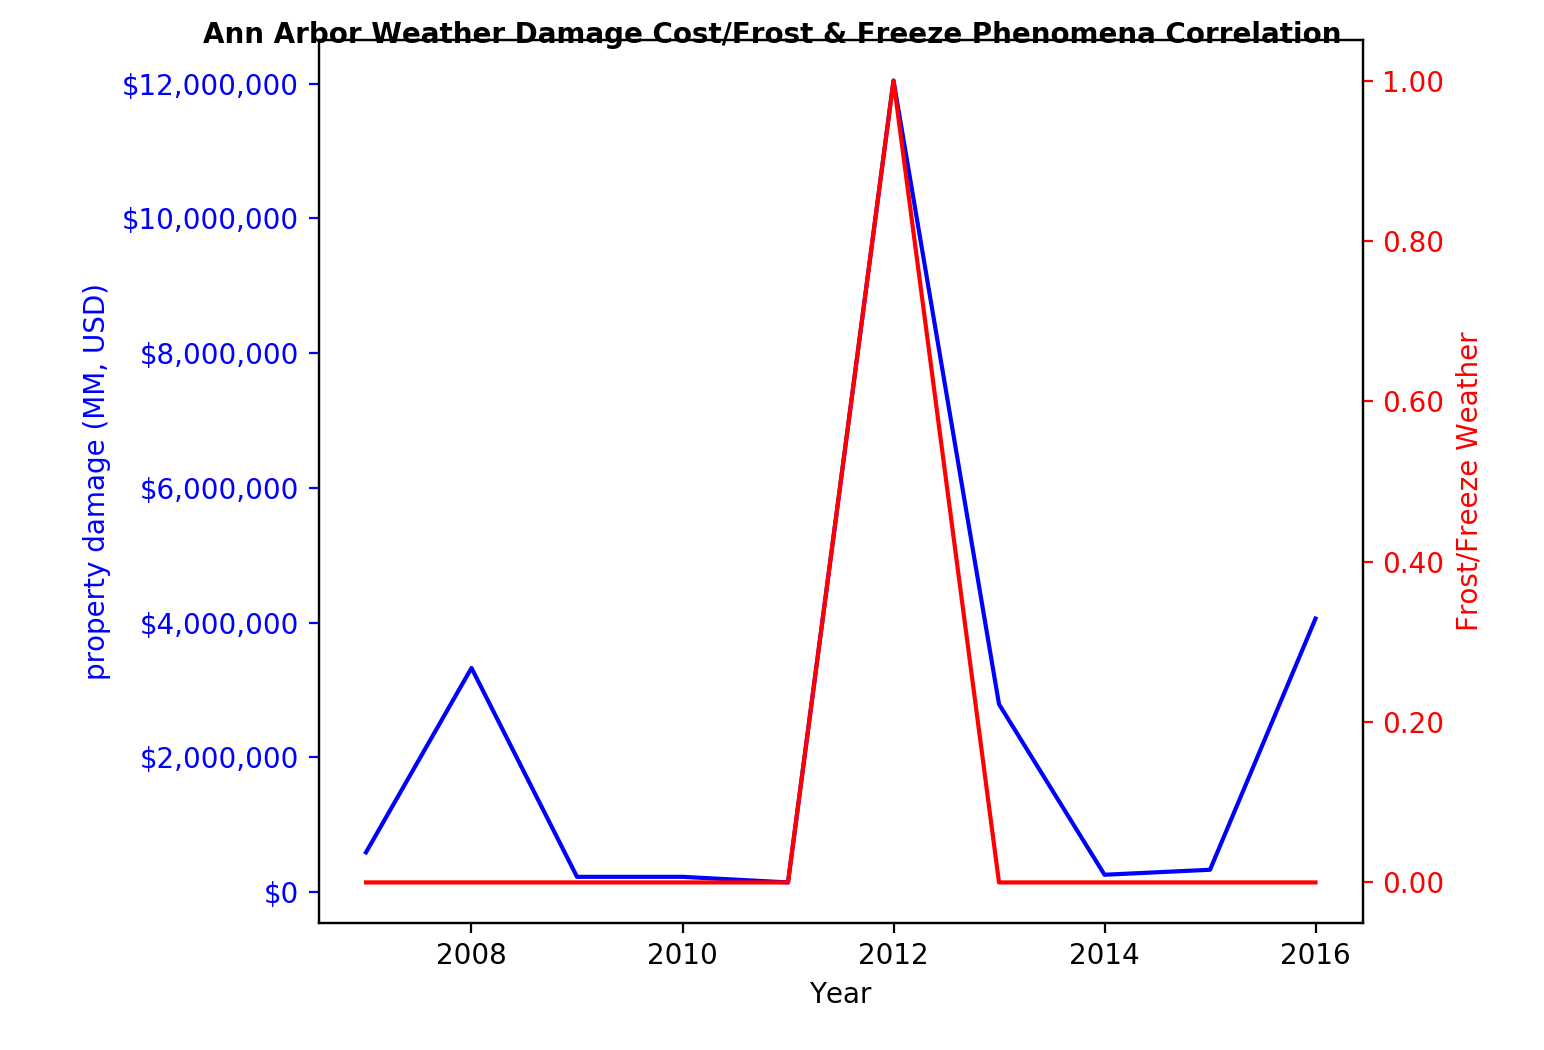

In [534]:
plt.close()
fig, axPopWeather = plt.subplots()


t = dfWeatherPopulation.index.values
s1 = dfWeatherPopulation['property_damage_sum']
axPopWeather.plot(t, s1, 'b-')
axPopWeather.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
axPopWeather.set_ylabel('property damage (MM, USD)', color='b')
axPopWeather.tick_params('y', colors='b')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axPopWeather.yaxis.set_major_formatter(tick) 


axFrostFreeze = axPopWeather.twinx()
s2 = dfWeatherPopulation['Frost/Freeze']
axFrostFreeze.plot(t, s2, 'r-')
axFrostFreeze.set_ylabel('Frost/Freeze Weather', color='r')
axFrostFreeze.tick_params('y', colors='r')

fmtC = '{x:,.2f}'
tickC = mtick.StrMethodFormatter(fmtC)
axFrostFreeze.yaxis.set_major_formatter(tickC) 


fig.tight_layout()

fig.suptitle('Ann Arbor Weather Damage Cost/Frost & Freeze Phenomena Correlation', fontsize=10, fontweight='bold')

plt.show()

<IPython.core.display.Javascript object>


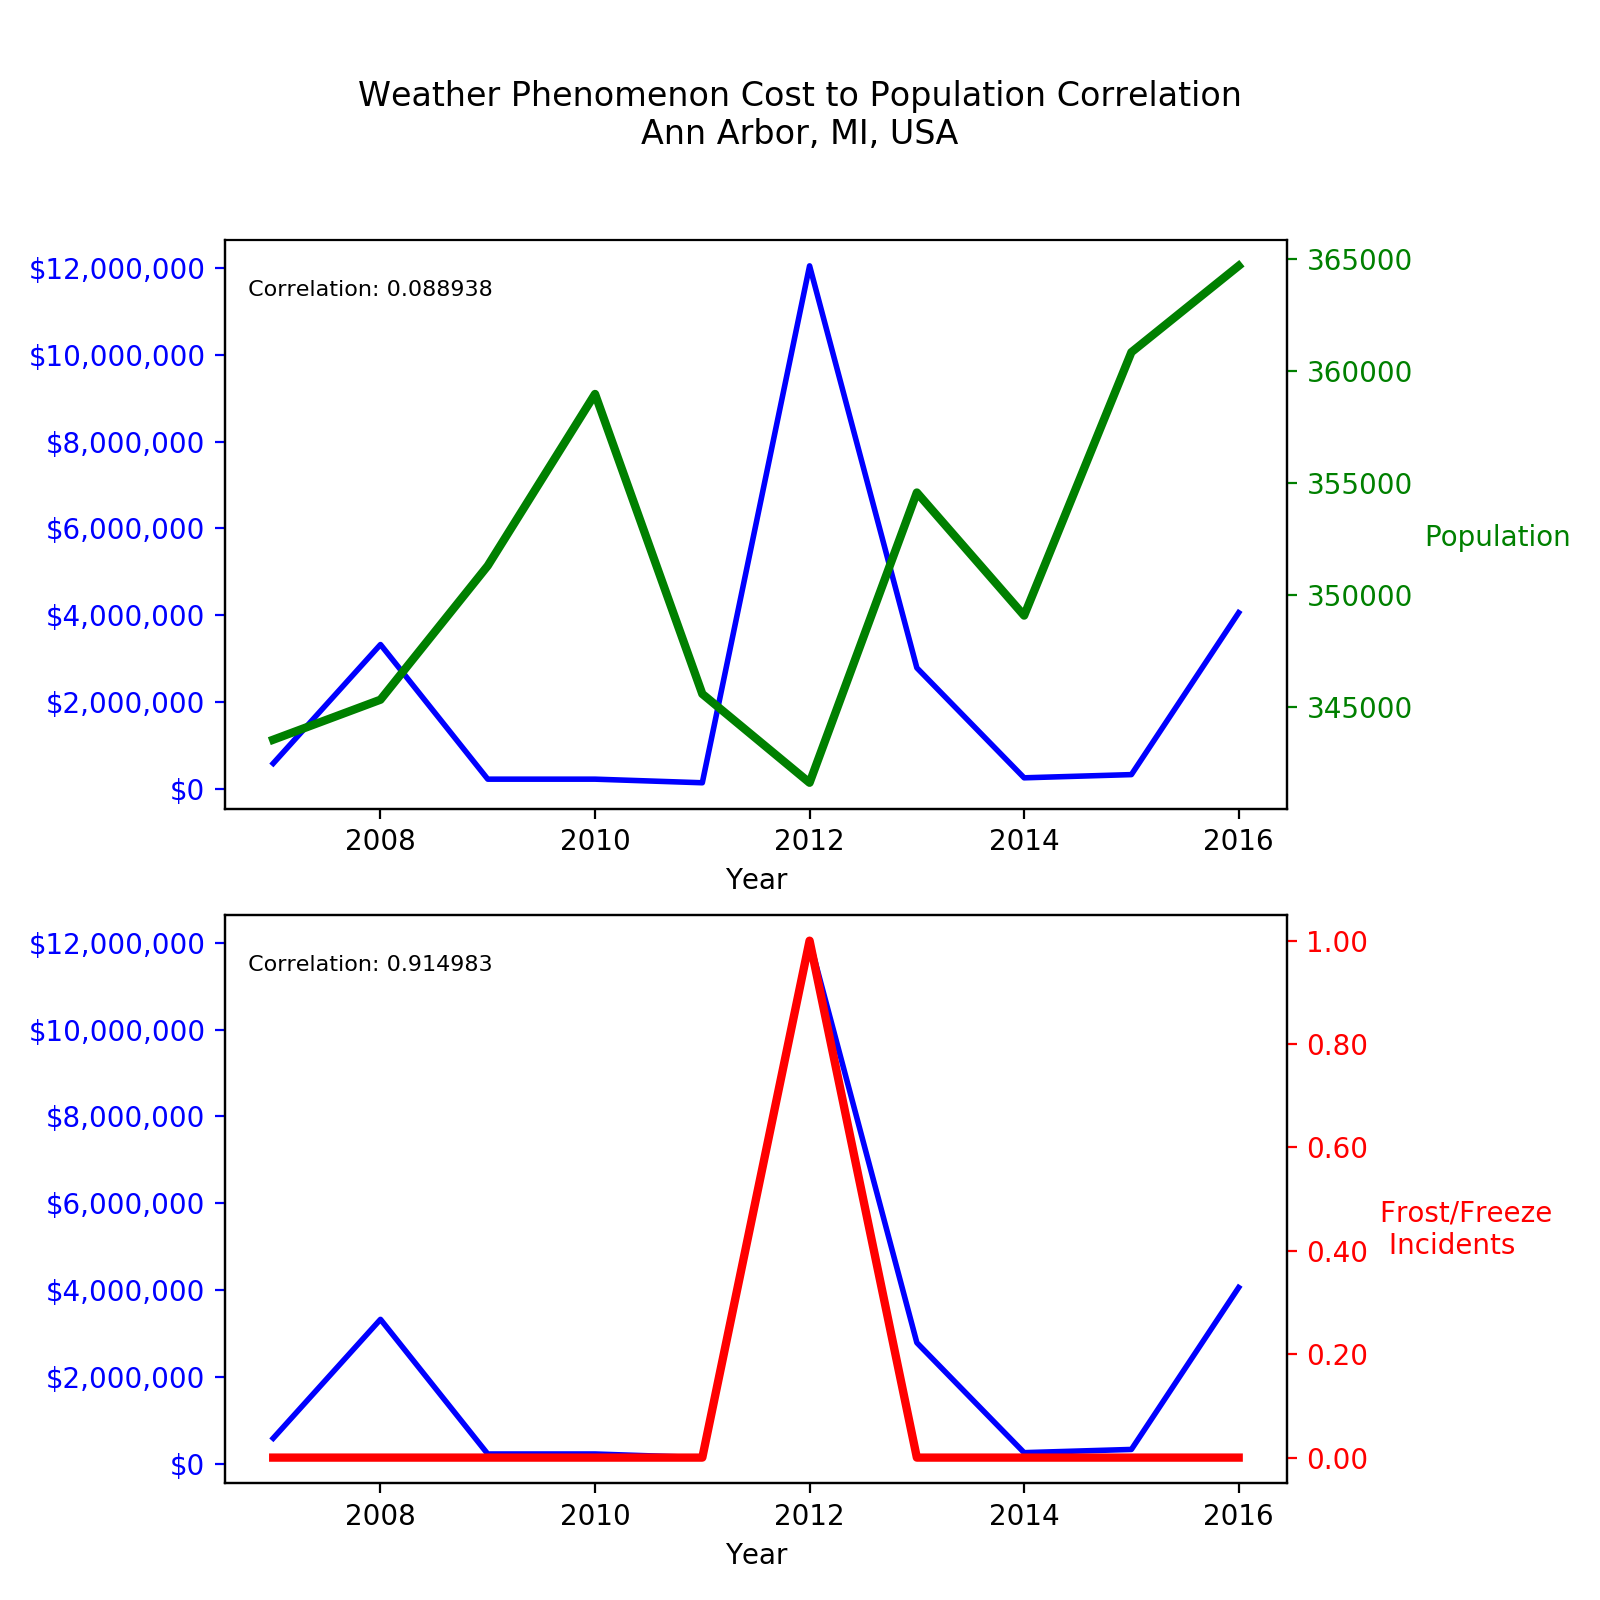

In [665]:
from matplotlib import rcParams


fig = plt.figure()
st = fig.suptitle("Weather Phenomenon Cost to Population Correlation\nAnn Arbor, MI, USA")

fmt = '${x:,.0f}'
#fmt = '${$%1.1fM}'
tick = mtick.StrMethodFormatter(fmt)

ax1 = fig.add_subplot(212)
ax1Title = " Correlation: {:f}".format(0.914983)
ax2Title = " Correlation: {:f}".format(0.088938)

#fig.text(.14, .86, 'Figure A')
#fig.text(.14, .44, 'Figure B')

ax1.set_title(ax1Title, fontsize="8", loc="left", position=(.015,.95))

t = dfWeatherPopulation.index.values
s1 = dfWeatherPopulation['property_damage_sum']
ax1.plot(t, s1, 'b-', lw=2)
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
#ax1.set_ylabel('property damage \n (MM, USD)', color='b', rotation=0, ha='right')
ax1.tick_params('y', colors='b')

ax1.yaxis.set_major_formatter(tick) 
#ax1.xaxis.set_ticks_position('top')

axFrostFreeze = ax1.twinx()
s2 = dfWeatherPopulation['Frost/Freeze']
axFrostFreeze.plot(t, s2, 'r-', lw=3)
axFrostFreeze.set_ylabel('Frost/Freeze \n Incidents', color='r', rotation=0, ha='left')
axFrostFreeze.tick_params('y', colors='r')

fmtC = '{x:,.2f}'
tickC = mtick.StrMethodFormatter(fmtC)
axFrostFreeze.yaxis.set_major_formatter(tickC) 

###=============  Begin Plot 1,2 =============
ax2 = fig.add_subplot(211)

ax2.plot(t, s1, 'b-', lw=2)
ax2.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
#ax2.set_ylabel('property damage \n(MM, USD)', color='b', rotation=0, ha='right')
ax2.tick_params('y', colors='b')
ax2.set_title(ax2Title, fontsize="8", loc="left", position=(.015,.95))
ax2.spines["top"].set_visible(False)

ax2.yaxis.set_major_formatter(tick) 

axCensus = ax2.twinx()
s2 = dfWashtenawCensus['CensusPopulation']
axCensus.plot(t, s2, 'g-', lw=3)
axCensus.set_ylabel('Population', color='g', rotation=0, ha='left')
axCensus.tick_params('y', colors='g')

###=============  End Plot 1,2 =============

fig.tight_layout()
# shift subplots down:
st.set_y(.95)
fig.subplots_adjust(top=.85)

#Set the plot width to something readable
plt.rcParams["figure.figsize"] = [8,8]

plt.savefig('/Users/crothgeb/Desktop/DSwPython_Assignment4_2.png')